In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic3/titanic3.xls


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel('/kaggle/input/titanic3/titanic3.xls')

In [8]:
from sklearn import (ensemble, preprocessing, tree)
from sklearn.metrics import (auc, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.model_selection import (train_test_split, StratifiedKFold)

In [11]:
from yellowbrick.classifier import (ConfusionMatrix, ROCAUC)
from yellowbrick.model_selection import (LearningCurve)

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
print(df.shape)

(1309, 14)


In [14]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [16]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [17]:
import pandas_profiling

In [18]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [19]:
profile = pandas_profiling.ProfileReport(df); profile

In [20]:
import seaborn as sns

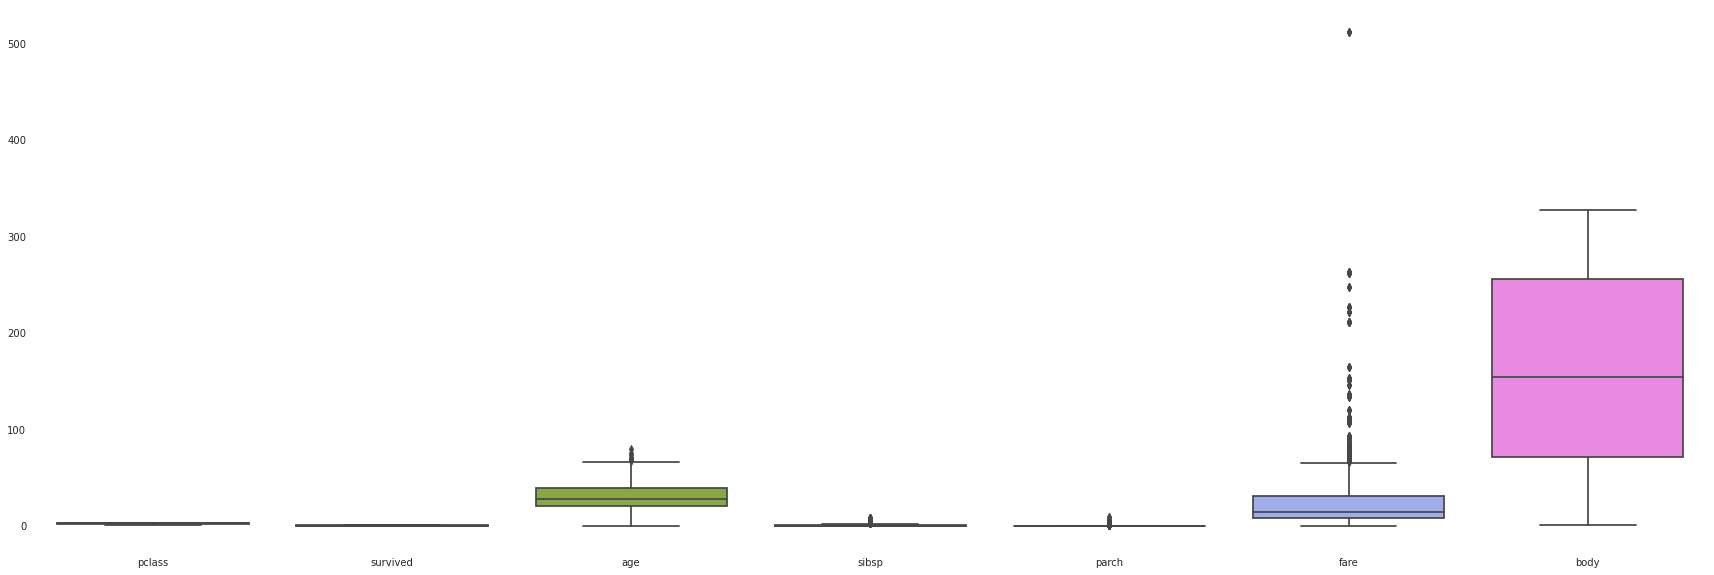

In [23]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(data=df)

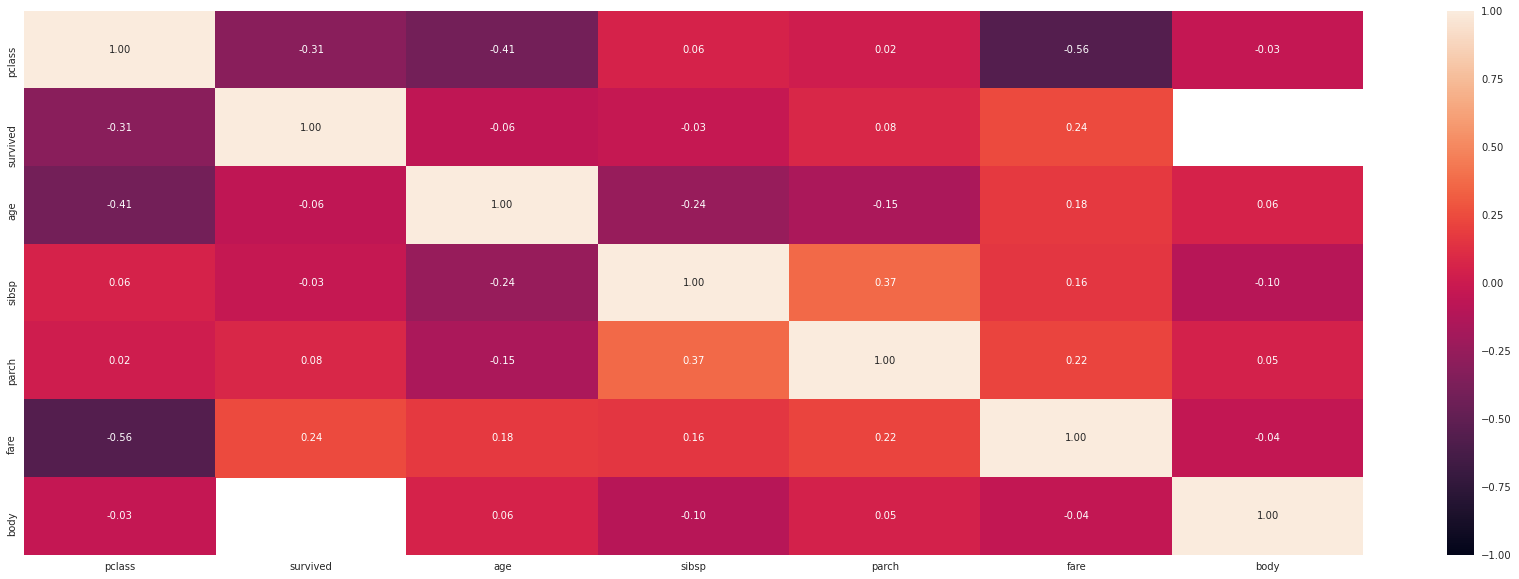

In [24]:
fig, ax=plt.subplots(figsize=(30, 10))
ax = sns.heatmap(df.corr(), fmt='.2f', annot=True, ax=ax, vmin=-1, vmax=1 )

In [25]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [27]:
porc_miss = df.isnull().mean()*100
round(porc_miss, 0)

pclass        0.0
survived      0.0
name          0.0
sex           0.0
age          20.0
sibsp         0.0
parch         0.0
ticket        0.0
fare          0.0
cabin        77.0
embarked      0.0
boat         63.0
body         91.0
home.dest    43.0
dtype: float64

In [28]:
import missingno as msno

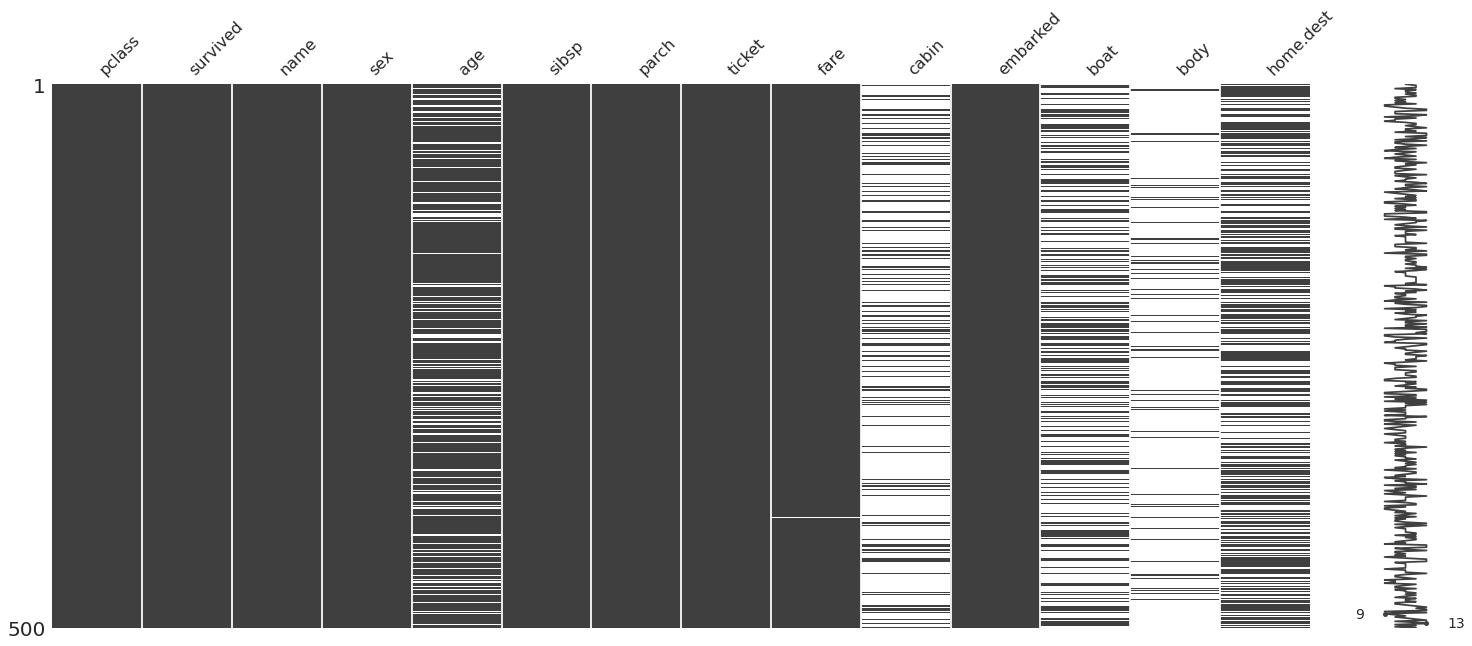

In [29]:
ax = msno.matrix(df.sample(500))

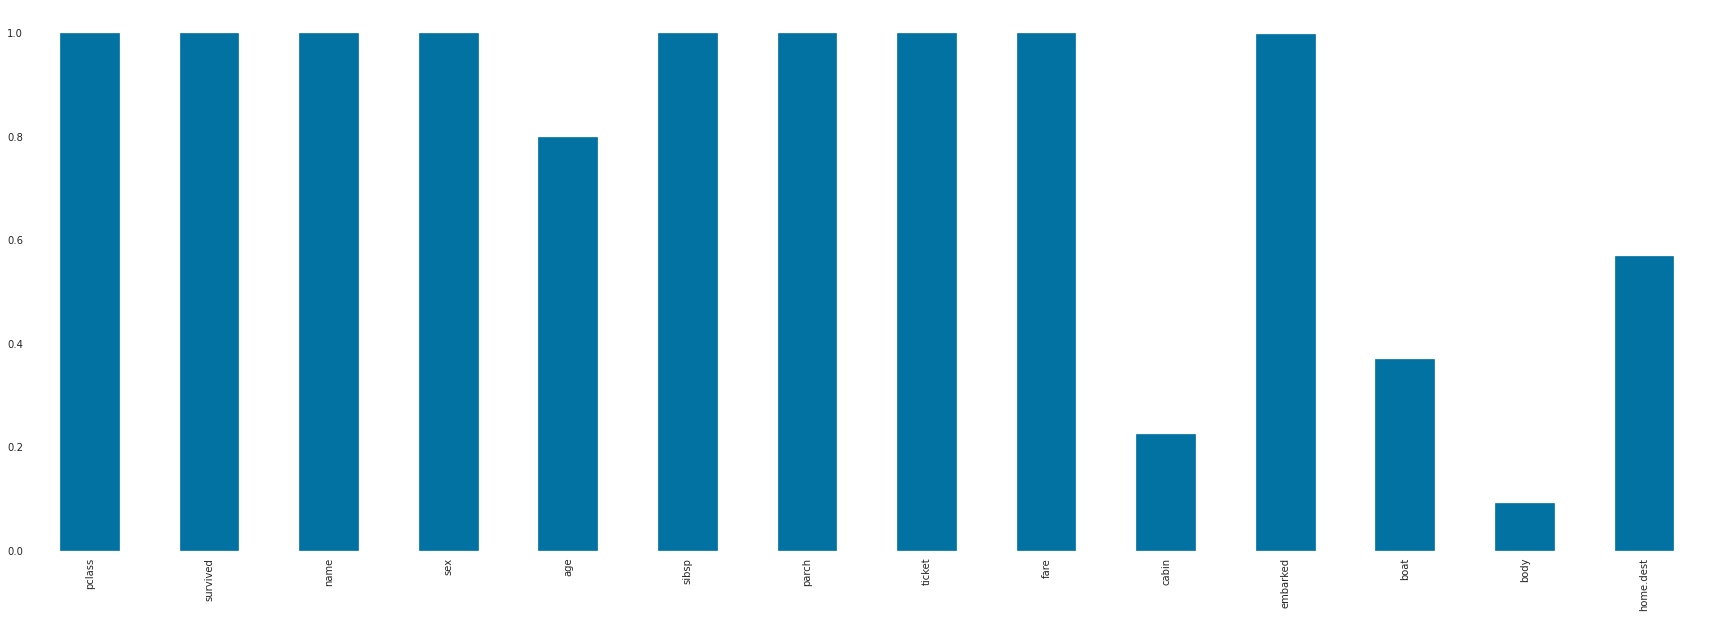

In [32]:
fig, ax=plt.subplots(figsize=(30,10))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

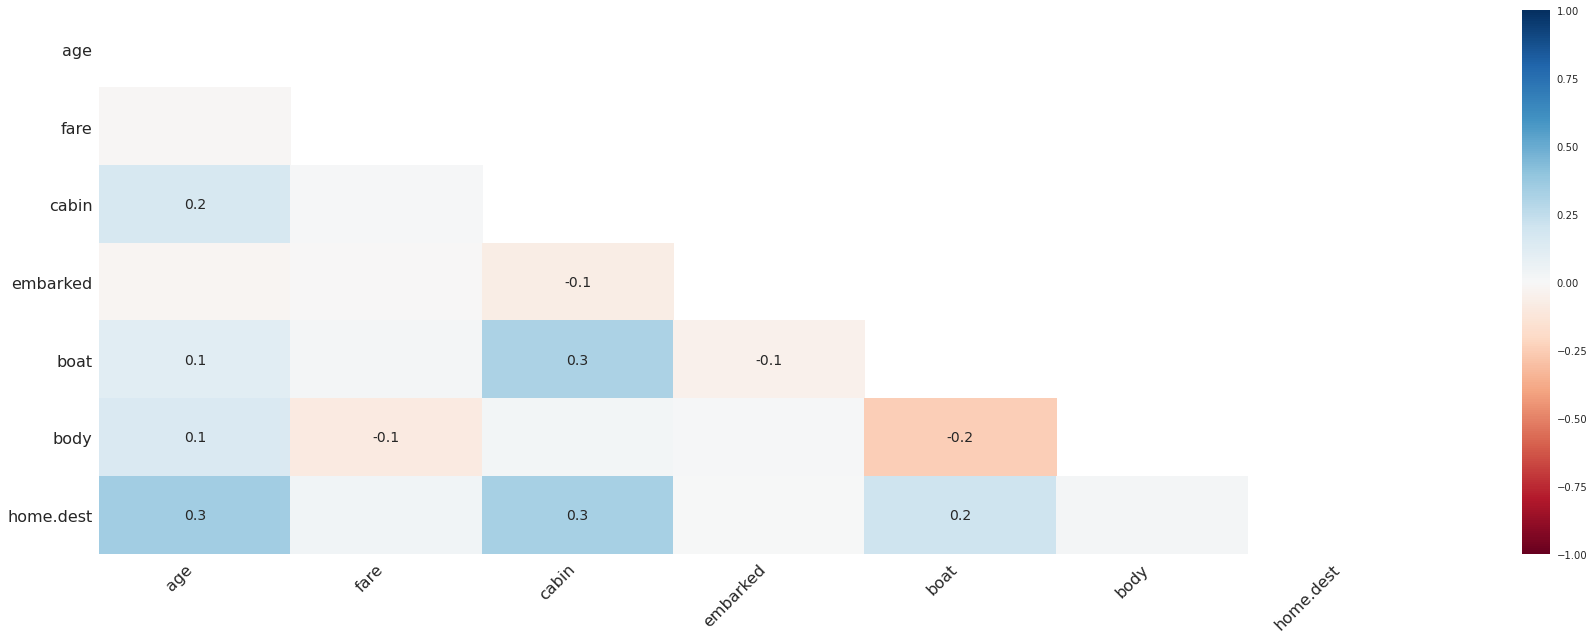

In [33]:
ax = msno.heatmap(df, figsize=(30, 10))

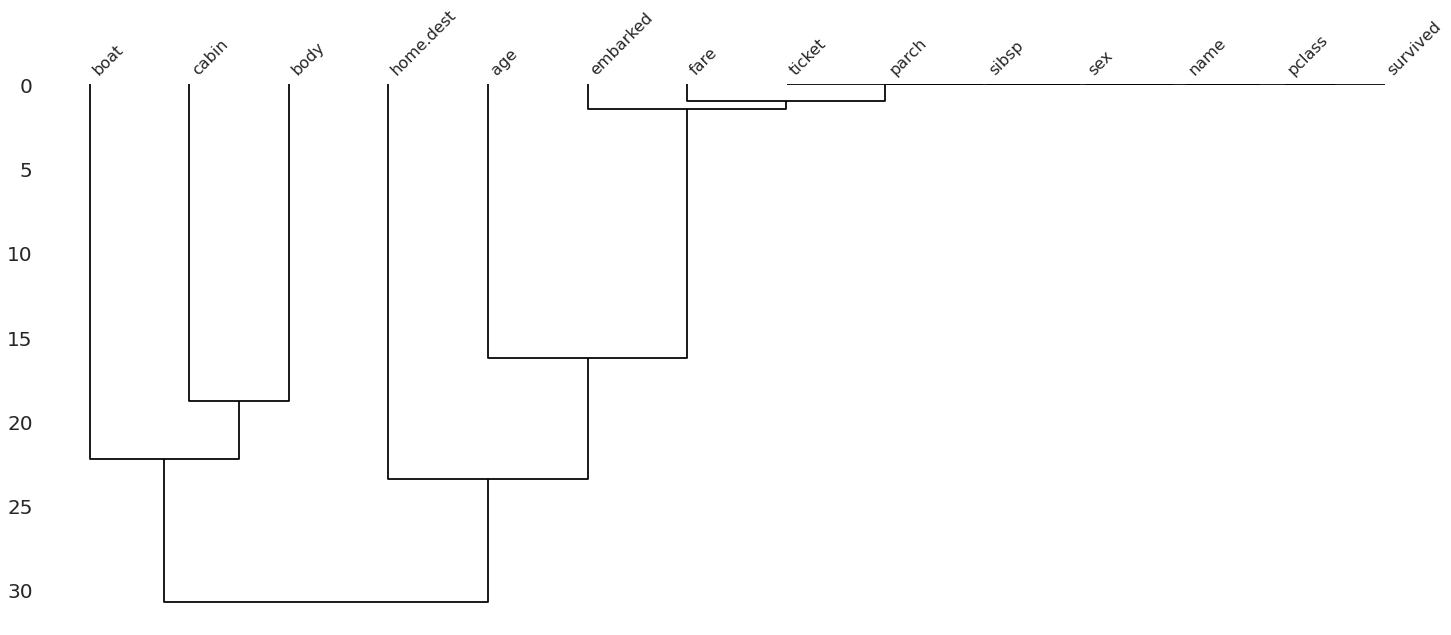

In [34]:
ax = msno.dendrogram(df)

In [35]:
df1 = df.drop(columns = ['name', 'ticket', 'home.dest', 'cabin', 'boat', 'body'])

In [36]:
df1.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [37]:
df1.sex.value_counts(dropna=False)

male      843
female    466
Name: sex, dtype: int64

In [38]:
df1.embarked.value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

In [39]:
df1 = pd.get_dummies(df1, drop_first=True)

In [40]:
df1.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [41]:
df1.isna().any().any()

True

In [42]:
df1.isnull().sum()

pclass          0
survived        0
age           263
sibsp           0
parch           0
fare            1
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

In [43]:
y = df1.survived
x = df1.drop(columns='survived')

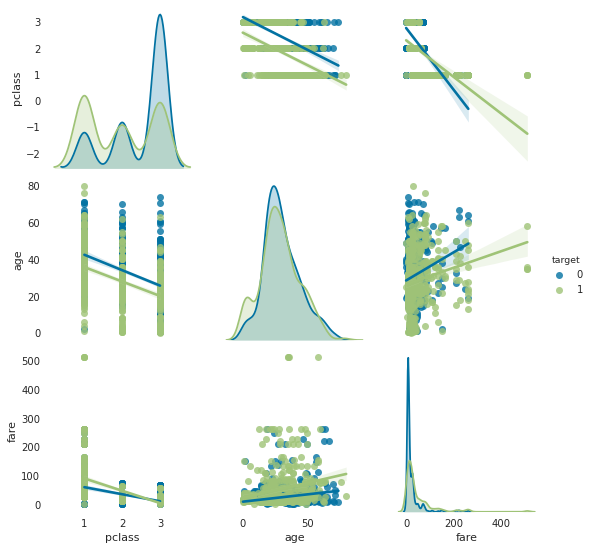

In [44]:
new_df = x.copy()
new_df['target'] = y
vars = ['pclass', 'age', 'fare']
p = sns.pairplot(new_df, vars=vars, hue='target', kind='reg')

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [47]:
meds = x_train.median()
x_train = x_train.fillna(meds)
x_test = x_test.fillna(meds)

In [48]:
x_train.isna().any().any()

False

In [49]:
x_test.isna().any().any()

False

In [50]:
cols = 'pclass,age,sibsp,fare,parch,sex_male,embarked_Q,embarked_S'.split(',')
sca = preprocessing.StandardScaler()
x_train = sca.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=cols)
x_test = sca.fit_transform(x_test)
x_test = pd.DataFrame(x_test, columns=cols)

In [54]:
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [56]:
for model in [LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, GaussianNB, SVC, RandomForestClassifier, xgboost.XGBClassifier]:
    cls = model()
    kfold = model_selection.KFold(n_splits=10)
    s = model_selection.cross_val_score(cls, x, y, scoring='roc_auc', cv=kfold)
    print(f'{model.__name__:22} AUC:' f'{s.mean():.3f} STD: {s.std():.2f}')

LogisticRegression     AUC:0.843 STD: 0.04
DecisionTreeClassifier AUC:0.753 STD: 0.06
KNeighborsClassifier   AUC:0.837 STD: 0.02
GaussianNB             AUC:0.820 STD: 0.04
SVC                    AUC:0.841 STD: 0.02
RandomForestClassifier AUC:0.838 STD: 0.03
XGBClassifier          AUC:0.837 STD: 0.03


In [57]:
from mlxtend.classifier import StackingClassifier

In [58]:
clfs = [x() for x in [LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, GaussianNB, SVC, RandomForestClassifier, xgboost.XGBClassifier]]

In [59]:
stack = StackingClassifier(classifiers=clfs, meta_classifier = LogisticRegression())

In [60]:
kfold = model_selection.KFold(n_splits=10)

In [61]:
s = model_selection.cross_val_score(stack, x, y, scoring='roc_auc', cv=kfold)

In [62]:
print(f'{stack.__class__.__name__} AUC:' f'{s.mean():.3f} STD: {s.std():.2f}')

StackingClassifier AUC:0.810 STD: 0.04


In [63]:
rf = ensemble.RandomForestClassifier(n_estimators=100)

In [68]:
rf.fit(x_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, 
                       n_estimators=10, n_jobs=1, oob_score=False, verbose=0, warm_start=False)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [69]:
rf.score(x_test, y_test)

0.7786259541984732

In [72]:
rf1 = ensemble.RandomForestClassifier()
params = {'max_features':[0.4, 'auto'], 'n_estimators':[15, 200], 'min_samples_leaf':[1, 0.1]}

In [73]:
cv = model_selection.GridSearchCV(rf1, params, n_jobs=-1).fit(x_train, y_train)

In [74]:
print(cv.best_params_)

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200}


In [75]:
rf2 = ensemble.RandomForestClassifier()
params = {'max_features':0.4, 'n_estimators':200, 'min_samples_leaf':1}

In [76]:
rf2.fit(x_train, y_train)
rf2.score(x_test, y_test)

0.7811704834605598

In [91]:
LR = LogisticRegression()
kfold = model_selection.KFold(n_splits=10)
s = model_selection.cross_val_score(LR, x, y, scoring='roc_auc', cv=kfold)
print('LogisticRegression' ' ' 'AUC:' f'{s.mean():.3f} STD: {s.std():.2f}')

LogisticRegression AUC:0.843 STD: 0.04


In [93]:
LR.fit(x_train, y_train)

LogisticRegression()

In [94]:
y_pred = LR.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[206,  39],
       [ 46, 102]])

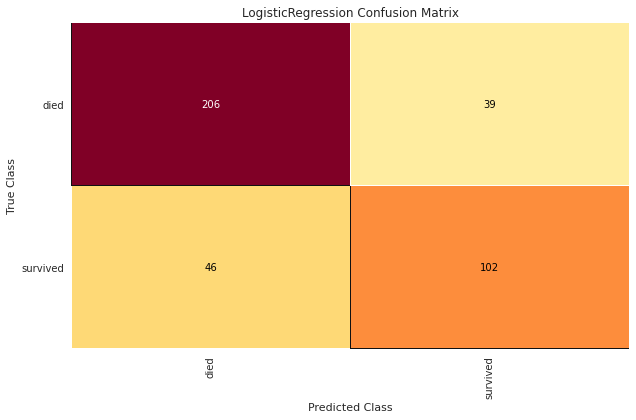

In [98]:
mapping = {0:'died', 1:'survived'}
fig, ax=plt.subplots(figsize=(10,6))
cm_viz = ConfusionMatrix(LR, classes=['died', 'survived'], label_encoder=mapping)
cm_viz.score(x_test, y_test)
cm_viz.poof()

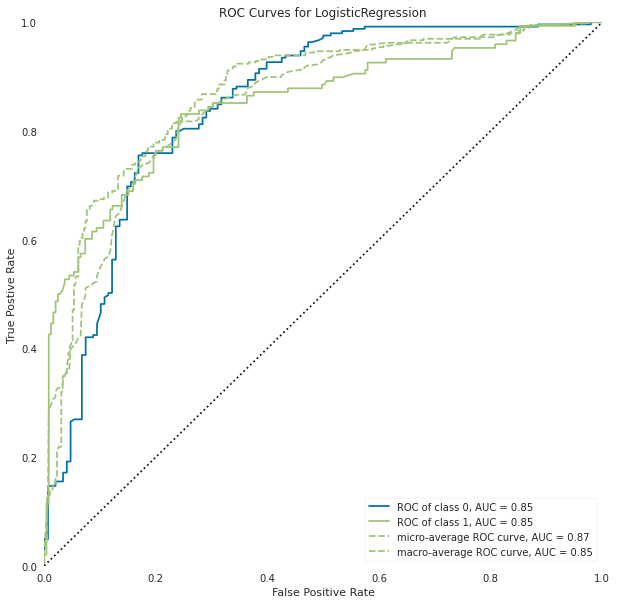

In [101]:
fig, ax = plt.subplots(figsize=(10,10))
roc_viz = ROCAUC(LR)
roc_viz.score(x_test, y_test)
roc_viz.poof()

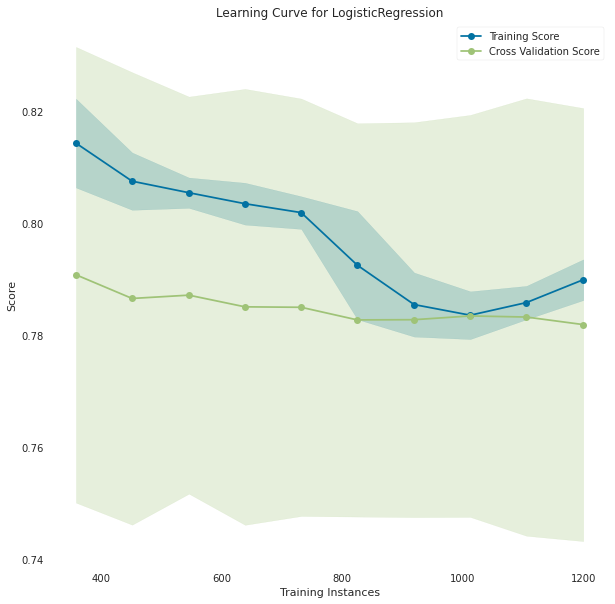

In [102]:
fig, ax = plt.subplots(figsize=(10, 10))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(LR, cv=cv, train_sizes=sizes, scoring='f1_weighted', n_jobs=4, ax=ax)
lc_viz.fit(x, y)
lc_viz.poof()